In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/2%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/carros_pre_processado.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,motor,marca,modelo,preco,quilometragem,ano,informacoes
0,1.4,Chevrolet,Agile,25990,91000,2011,Agile 1.4 Lt 5p
1,1.4,Chevrolet,Agile,28900,123915,2013,Agile 1.4 Ltz 5p
2,1.4,Chevrolet,Agile,28000,91000,2013,Agile 1.4 Lt 5p
3,1.4,Chevrolet,Agile,26890,151000,2011,Agile 1.4 Mpfi Ltz 8v
4,1.4,Chevrolet,Agile,31990,106863,2014,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16735 entries, 0 to 16734
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motor          15613 non-null  float64
 1   marca          16735 non-null  object 
 2   modelo         16735 non-null  object 
 3   preco          16735 non-null  int64  
 4   quilometragem  16735 non-null  object 
 5   ano            16735 non-null  int64  
 6   informacoes    16735 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 915.3+ KB


 - Excluindo os valores ausentes.

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

motor            0
marca            0
modelo           0
preco            0
quilometragem    0
ano              0
informacoes      0
dtype: int64

In [8]:
df.shape

(15613, 7)

 - Convertendo a coluna quilometragem para formato numérico.

In [9]:
df['quilometragem'] = df['quilometragem'].str.replace(',','0')
df['quilometragem'] = df['quilometragem'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 16734
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motor          15613 non-null  float64
 1   marca          15613 non-null  object 
 2   modelo         15613 non-null  object 
 3   preco          15613 non-null  int64  
 4   quilometragem  15613 non-null  float64
 5   ano            15613 non-null  int64  
 6   informacoes    15613 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 975.8+ KB


##  Criando o dataframe carros populares.

In [11]:
df.marca.value_counts()

Chevrolet        2177
Volkswagen       1816
Fiat             1752
Hyundai          1007
Renault          1007
Ford              956
Citroën           937
Peugeot           826
Nissan            643
Toyota            635
Land              552
Mitsubishi        545
Kia               520
Honda             517
Mercedes-benz     506
Bmw               486
Jeep              368
Audi              270
Suzuki             93
Name: marca, dtype: int64

 - Selecionando as marcas

In [12]:
filtro_carros_populares = ['Chevrolet','Volkswagen','Fiat','Renault','Hyundai','Ford',
 'Citroën','Peugeot','Nissan','Toyota','Mitsubishi','Kia','Honda','Suzuki']

In [13]:
carros_populares = df.set_index('marca')
carros_populares = carros_populares.loc[filtro_carros_populares]
carros_populares = carros_populares.reset_index()

 - Estababelecendo condições para selecionar apenas carros populares.

In [14]:
carros_populares = carros_populares.query('preco<=80000')
carros_populares = carros_populares.query('preco >= 5000')
carros_populares = carros_populares.query('quilometragem >= 5000')

In [15]:
carros_populares.shape

(9499, 7)

In [16]:
carros_populares.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9499.0,1.71,0.55,1.0,1.4,1.6,2.0,6.2
preco,9499.0,40163.98,18052.65,5000.0,25900.0,36900.0,52900.0,80000.0
quilometragem,9499.0,108159.72,91639.74,5000.0,62086.5,96000.0,133378.5,999999.0
ano,9499.0,2012.52,5.23,1973.0,2010.0,2013.0,2016.0,2021.0


 - Visualizando a distribuição dos dados.

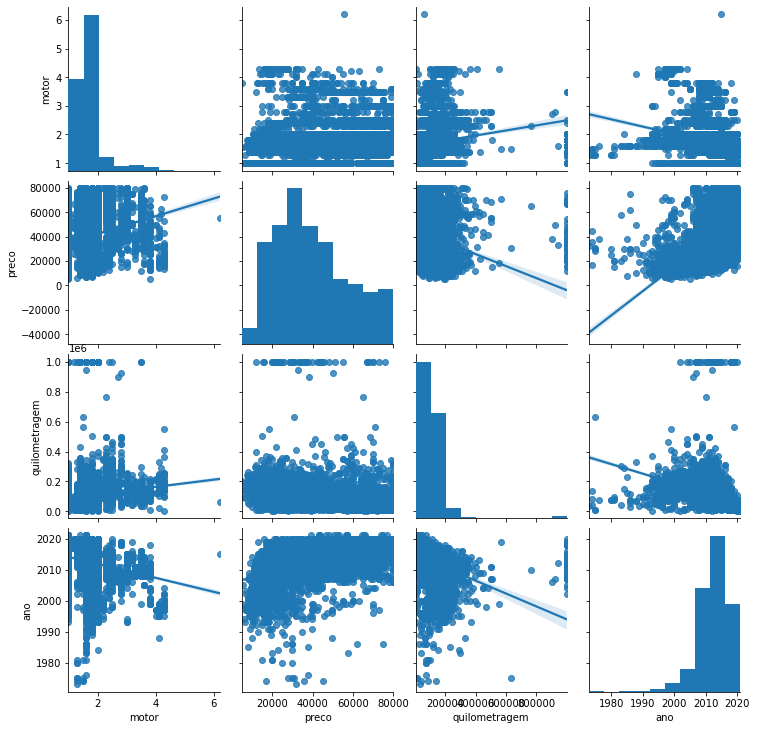

In [17]:
sns.pairplot(data=carros_populares, kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B821CD0>,
      dtype=object)

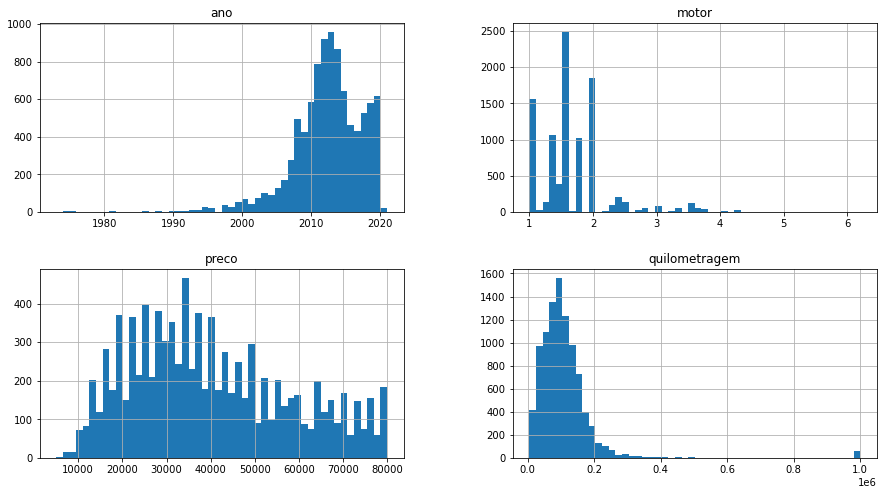

In [18]:
carros_populares.hist(bins=50, figsize=(15,8))

In [19]:
carros_populares = carros_populares.query('quilometragem <=210000')

In [20]:
dados = carros_populares

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CFF6C40>,
      dtype=object)

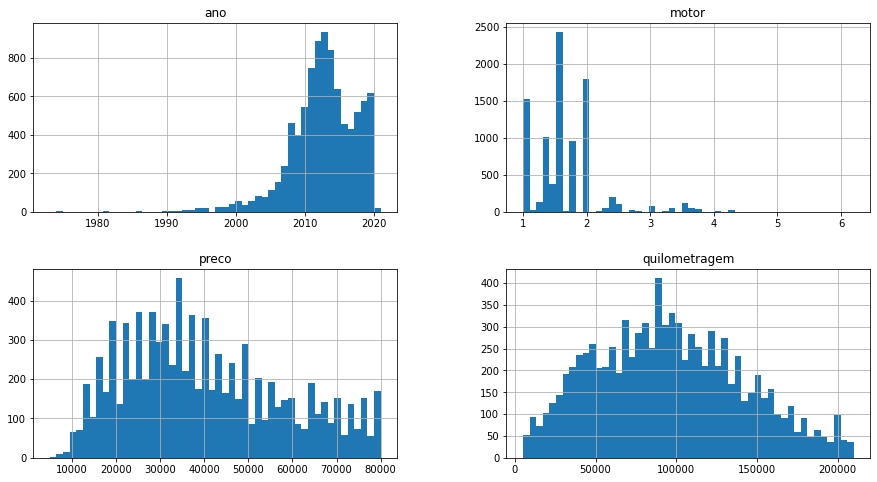

In [21]:
dados.hist(bins=50, figsize=(15,8))

In [22]:
dados.shape

(9073, 7)

In [23]:
dados = dados.query('ano >= 2008')

In [24]:
dados.shape

(8071, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F0B6D90>,
      dtype=object)

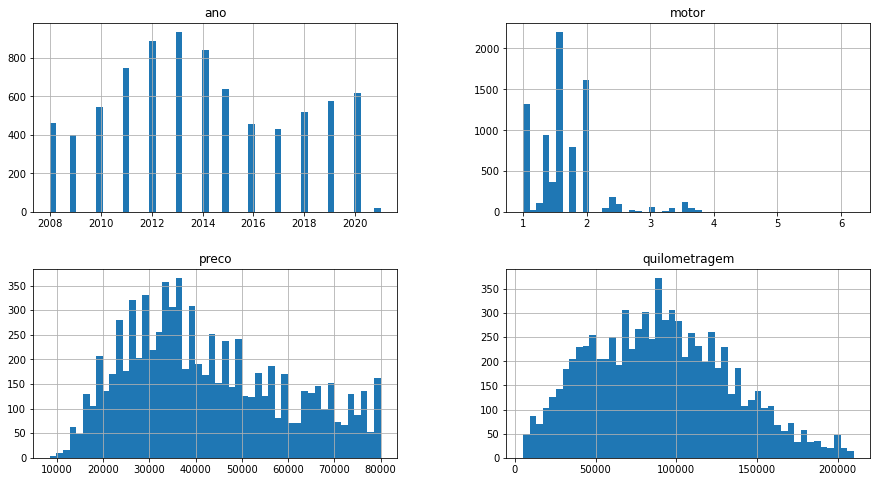

In [25]:
dados.hist(bins=50, figsize=(15,8))

 - Observando outliers

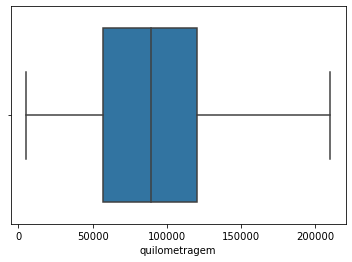

In [26]:
sns.boxplot(dados['quilometragem'])

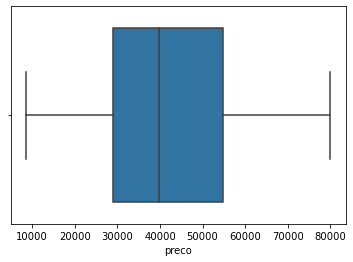

In [27]:
sns.boxplot(dados['preco'])

 - Excluindo alguns modelos.

In [28]:
dados.modelo.value_counts()

Aircross     89
March        88
I30          88
Versa        86
voyage       86
             ..
Sprinter      1
Hilux-SW4     1
Camaro        1
Classe-C      1
Hilux         1
Name: modelo, Length: 153, dtype: int64

In [29]:
dados.modelo.value_counts().tail(29)

HR             23
Clio-Sedan     23
Tiguan         22
S10            20
RAV4           19
C3-Aircross    19
HB20X          18
Frontier       16
Omega          16
Parati         15
Creta          12
blazer         11
Ranger         11
Classe-A       10
L200           10
Amarok          9
Jumper          9
Toro            9
T-Cross         6
Ducato          6
Trailblaze      5
Escort          4
Master          2
SW4             2
Sprinter        1
Hilux-SW4       1
Camaro          1
Classe-C        1
Hilux           1
Name: modelo, dtype: int64

In [30]:
drop = list(dict(dados.modelo.value_counts().tail(29)).keys())
dados = dados.set_index('modelo')
dados = dados.drop(drop)
dados = dados.reset_index()

In [31]:
dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,7769.0,1.66,0.50,1.0,1.4,1.6,2.0,3.8
preco,7769.0,42239.35,16867.66,8500.0,28990.0,38969.0,53990.0,80000.0
quilometragem,7769.0,89710.59,42726.23,5000.0,56320.0,88502.0,119769.0,210000.0
ano,7769.0,2014.00,3.50,2008.0,2011.0,2014.0,2017.0,2021.0


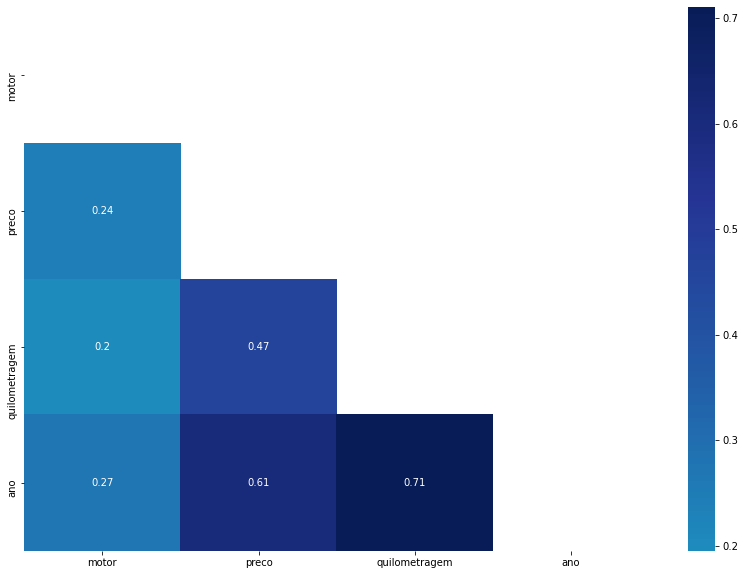

In [32]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

## EDA

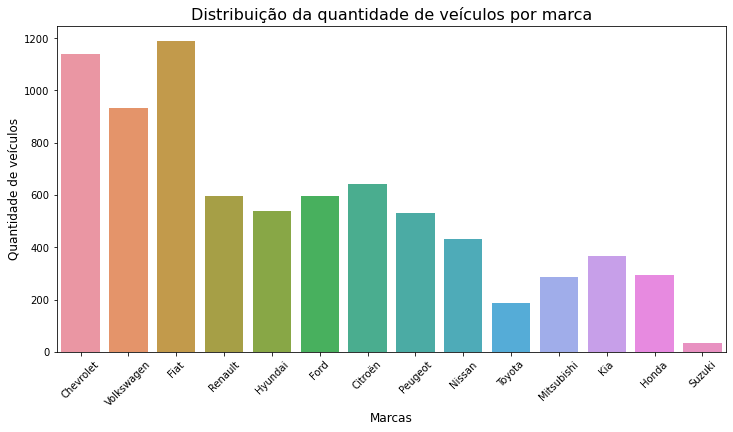

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x = dados['marca'],data = dados)
plt.title('Distribuição da quantidade de veículos por marca', fontsize = 16)
plt.xlabel('Marcas', fontsize = 12)
plt.ylabel('Quantidade de veículos', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

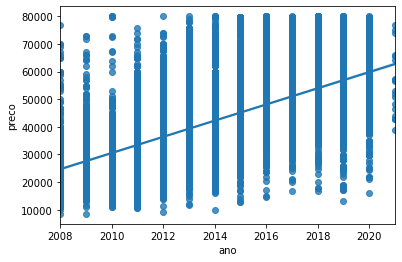

In [35]:
sns.regplot('ano','preco', data = dados)

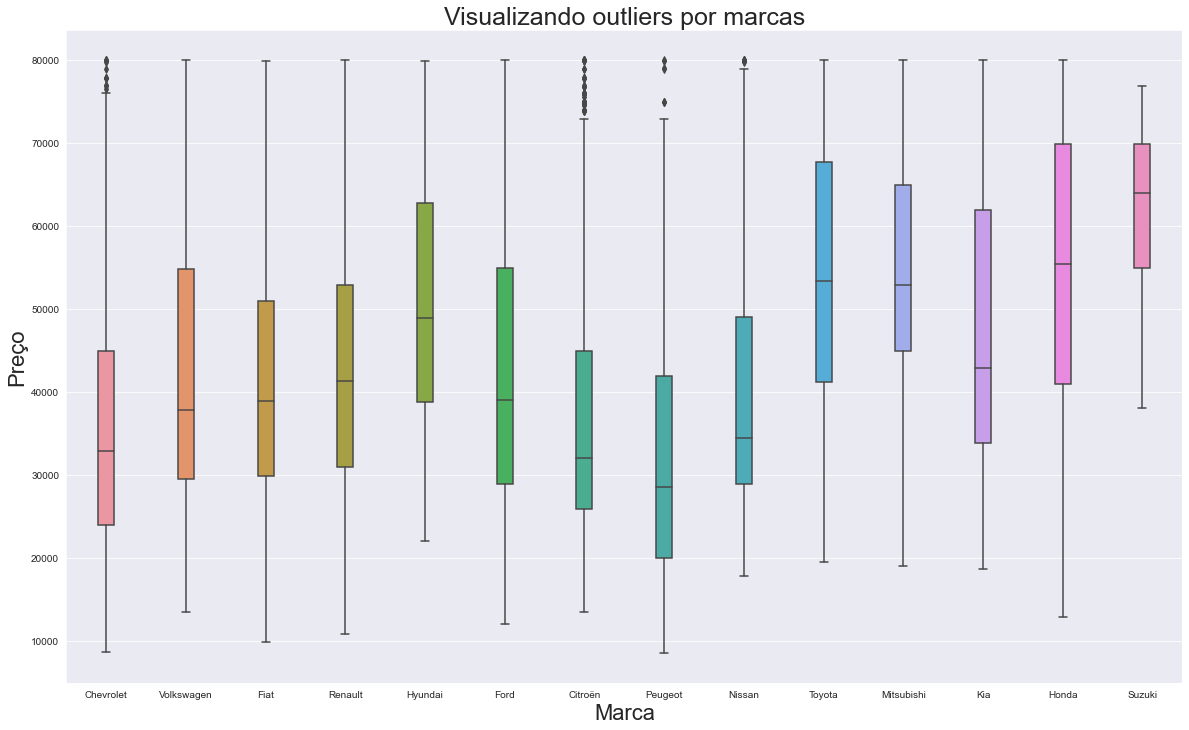

In [36]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='marca', y='preco', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Visualizando outliers por marcas', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Marca', fontsize=22)
ax

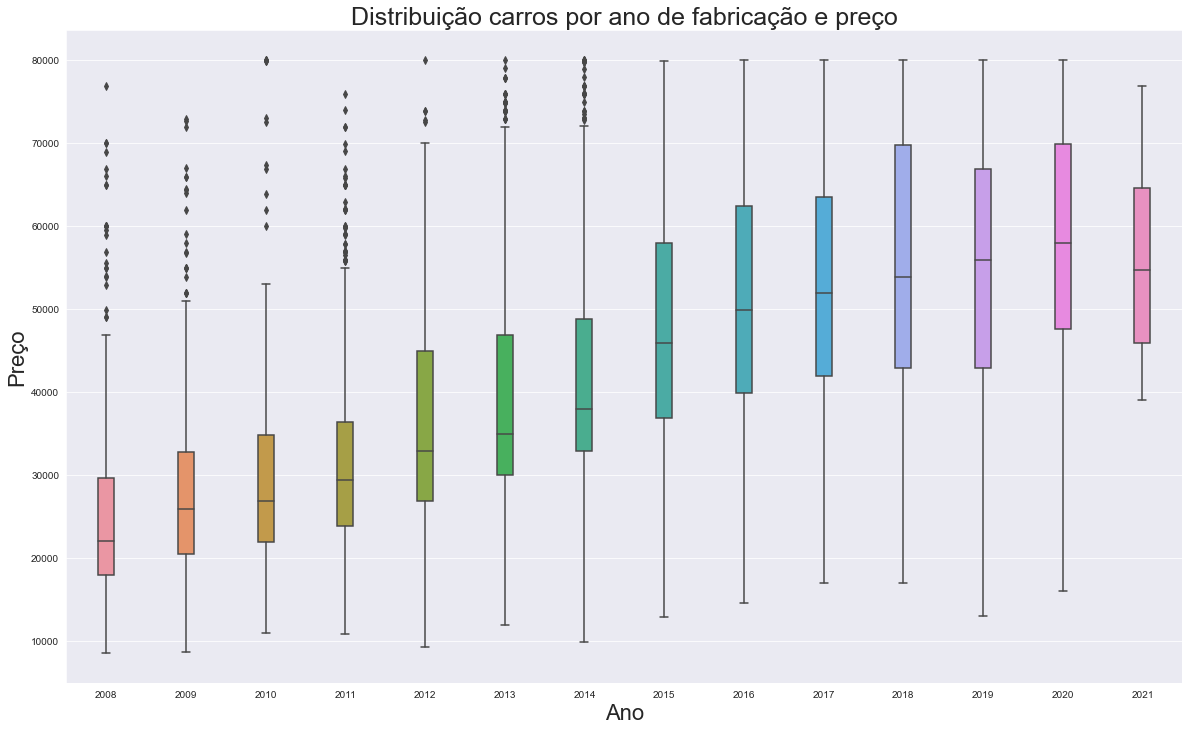

In [37]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='ano', y='preco', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros por ano de fabricação e preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Ano', fontsize=22)
ax

In [38]:
df.columns

Index(['motor', 'marca', 'modelo', 'preco', 'quilometragem', 'ano',
       'informacoes'],
      dtype='object')

Text(0.5, 1.15, 'Dispersão entre as variáveis')

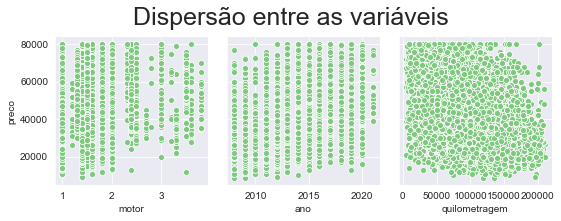

In [39]:
ax = sns.pairplot(data=dados,y_vars = 'preco', x_vars = ['motor', 'ano', 'quilometragem'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=25 ,y=1.15)

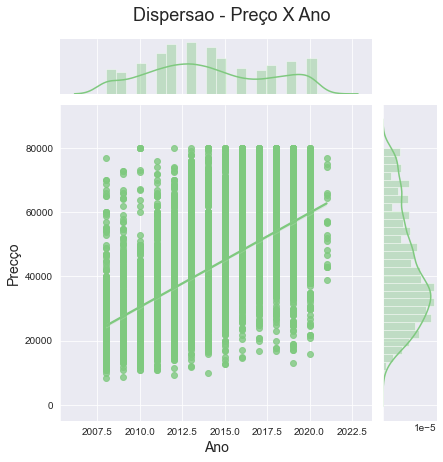

In [40]:
ax = sns.jointplot(x="ano", y="preco", data=dados, kind = 'reg')
ax.fig.suptitle('Dispersao - Preço X Ano', fontsize=18, y=1.05)
ax.set_axis_labels("Ano", "Precço", fontsize=14)
ax

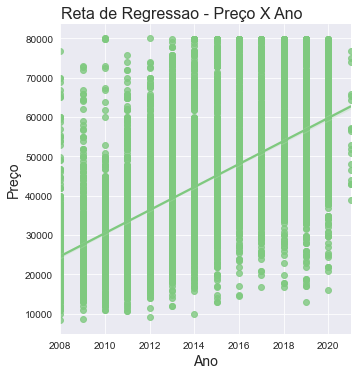

In [41]:
ax= sns.lmplot(x="ano", y="preco", data=dados)
ax.fig.suptitle('Reta de Regressao - Preço X Ano', fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Preço", fontsize=14)
ax

 - Salvando o Dataset sem outliers em um arquivo csv.

In [ ]:
df.to_csv('carros_populares_sem_outliers.csv',index =False , encoding = 'utf-8')